In [2]:
!wget https://www.dropbox.com/s/5nr4q08af06gmfv/ShipClassification.zip?dl=0

--2019-06-08 16:45:14--  https://www.dropbox.com/s/5nr4q08af06gmfv/ShipClassification.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/5nr4q08af06gmfv/ShipClassification.zip [following]
--2019-06-08 16:45:15--  https://www.dropbox.com/s/raw/5nr4q08af06gmfv/ShipClassification.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucfd8853ccf20433853d721edba2.dl.dropboxusercontent.com/cd/0/inline/AidCecqInav-ds6PDZL379VpWSsxUKjkzzjtLzeiyKpeWfkHqhGtPLLyBM0AREw1E2OyzTQ_qKxz8D32YSeMgvykGtVr0WiimxxCxCTFJRVBpg/file# [following]
--2019-06-08 16:45:15--  https://ucfd8853ccf20433853d721edba2.dl.dropboxusercontent.com/cd/0/inline/AidCecqInav-ds6PDZL379VpWSsxUKjkzzjtLzeiyKpeWfkHqhGtPLLyBM0AREw1E2OyzTQ_qKxz8D32YSeMgvykGtVr0Wiim

In [3]:
!ls

 sample_data	     'ShipClassification.zip?dl=0'
 ShipClassification  'ShipClassification.zip?dl=0.1'


In [6]:
from zipfile import ZipFile
file_name="ShipClassification.zip?dl=0"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print("done")

done


In [7]:
!ls

 sample_data	     'ShipClassification.zip?dl=0'
 ShipClassification  'ShipClassification.zip?dl=0.1'


In [0]:

%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai import *
from fastai.vision import *
import fastai.vision as fa
from fastai.metrics import error_rate

In [0]:
path = Path('/content/ShipClassification/')

In [11]:
!pip install patool

In [13]:
import patoolib
patoolib.extract_archive("/content/ShipClassification/train.zip",outdir=path)

patool: Extracting /content/ShipClassification/train.zip ...
patool: running /usr/bin/7z x -o/content/ShipClassification -- /content/ShipClassification/train.zip


PatoolError: ignored

In [14]:
path.ls()

[PosixPath('/content/ShipClassification/test_ApKoW4T.csv'),
 PosixPath('/content/ShipClassification/test'),
 PosixPath('/content/ShipClassification/images'),
 PosixPath('/content/ShipClassification/train.zip'),
 PosixPath('/content/ShipClassification/labels.csv'),
 PosixPath('/content/ShipClassification/__MACOSX'),
 PosixPath('/content/ShipClassification/sample_submission_ns2btKE.csv'),
 PosixPath('/content/ShipClassification/models')]

In [9]:
import os  
os.rename('/content/ShipClassification/train.csv','/content/ShipClassification/labels.csv') 

FileNotFoundError: ignored

In [0]:
labels = pd.read_csv('/content/ShipClassification/labels.csv') 
test = pd.read_csv('/content/ShipClassification/test_ApKoW4T.csv')
submit = pd.read_csv('/content/ShipClassification/sample_submission_ns2btKE.csv')


In [12]:

labels.shape, test.shape


((6252, 2), (2680, 1))

In [0]:
labels.dtypes

In [0]:
os.makedirs("/content/ShipClassification/test")

In [0]:
torch.cuda.is_available()

In [0]:
import os
import shutil
src = '/content/ShipClassification/images/'
dst = '/content/ShipClassification/test/'
for i in range(test.shape[0]):
 srcpath = os.path.join(src, test['image'][i])
 dstpath = os.path.join(dst, test['image'][i])
 shutil.copyfile(srcpath, dstpath)

In [0]:
def get_ex(): return open_image(path/'images/626289.jpg')

def plots_f(rows, cols, width, height, **kwargs):
    [get_ex().apply_tfms(tfms[0], **kwargs).show(ax=ax) for i,ax in enumerate(plt.subplots(
        rows,cols,figsize=(width,height))[1].flatten())]

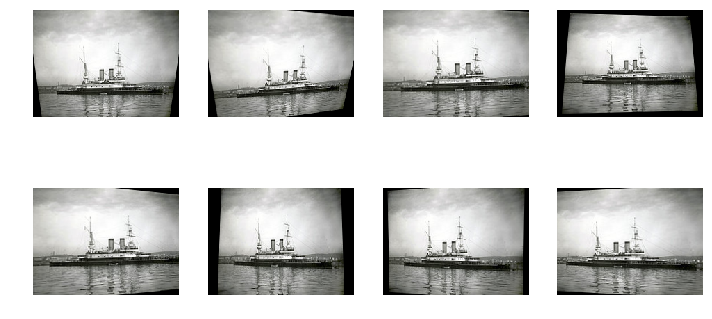

In [18]:
tfm = symmetric_warp(magnitude=(-0.2,0.2))
_, axs = plt.subplots(2,4,figsize=(12,6))
for ax in axs.flatten():
    img = get_ex().apply_tfms(tfm, padding_mode='zeros')
    img.show(ax=ax)

In [0]:
np.random.seed(42)
bs=16


tfms = get_transforms()

data = ImageDataBunch.from_csv(path,folder='images',csv_labels='labels.csv',label_delim=',',valid_pct=0.2, ds_tfms=tfms,test='test',size=224,bs=bs)


                      
stats=data.batch_stats()  
                      
data.normalize(stats)


In [0]:
def get_data(sz):

 np.random.seed(42)
 bs=16


 tfms = get_transforms()

 data = ImageDataBunch.from_csv(path,folder='images',csv_labels='labels.csv',label_delim=',',valid_pct=0.2, ds_tfms=tfms,test='test',size=sz,bs=bs)


                      
 stats=data.batch_stats()  
                      
 data.normalize(stats)


In [0]:
data.train_ds.process()

In [0]:
data.show_batch(rows=2, figsize=(15,10))

In [0]:
data.classes

In [0]:
data.show_batch(rows=3, figsize=(7,8))

In [22]:
data.c, len(data.train_ds), len(data.valid_ds), len(data.test_ds)

(5, 5002, 1250, 2680)

In [0]:
#from fastai.metrics import error_rate
acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta, thresh=0.2)
learn =cnn_learner(data, models.densenet121,metrics=[acc_02,f_score])


In [19]:

learn.fit_one_cycle(4)



epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.232905,0.155137,0.911680,0.875238,01:53
1,0.150688,0.105403,0.947520,0.919276,01:45
2,0.127978,0.088349,0.958720,0.937867,01:44
3,0.105075,0.087348,0.955680,0.934248,01:44


In [0]:
learn.save('stage-1')

In [22]:
learn.unfreeze()
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.32E-06


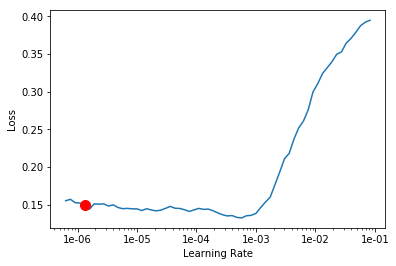

In [31]:

learn.recorder.plot(suggestion=True)

In [0]:
min_grad_lr = learn.recorder.min_grad_lr
min_grad_lr

In [0]:
learn.recorder.plot_lr(show_moms=True)

In [24]:
learn.fit_one_cycle(8, slice(1E-04,1E-03))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.099225,0.086171,0.958560,0.935543,02:17
1,0.123660,0.086250,0.955200,0.933390,02:18
2,0.117968,0.093901,0.956320,0.930724,02:17
3,0.078297,0.079690,0.964480,0.939905,02:17
4,0.066596,0.069558,0.967360,0.946667,02:17
5,0.047779,0.057975,0.975040,0.956210,02:17
6,0.029674,0.058709,0.977120,0.957867,02:17
7,0.023385,0.056347,0.977920,0.959333,02:17


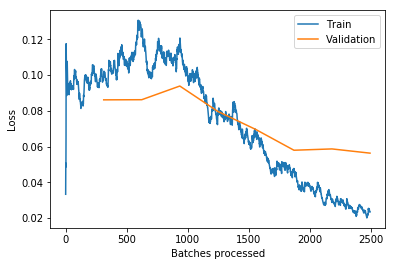

In [25]:
learn.recorder.plot_losses()

In [0]:
learn.save('stage-2')

In [0]:
learn.load('stage-2')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [29]:
interp.plot_confusion_matrix()

RuntimeError: ignored

In [0]:
preds,_ = learn.get_preds(ds_type=DatasetType.Test)
labels = np.argmax(preds, 1)

test_predictions_direct = [data.classes[int(x)] for x in labels]

In [0]:
test_predictions_direct

In [0]:
fnames = [f.name for f in learn.data.test_ds.items]

In [0]:
df = pd.DataFrame({'image':fnames, 'category':test_predictions_direct}, columns=['image', 'category'])

In [33]:
df.head()

,image,category
0,2851895.jpg,1
1,2839755.jpg,3
2,2847764.jpg,1
3,2841703.jpg,1
4,2818916.jpg,1


In [0]:
df.to_csv("data_fastai_27.csv",index=False)
from google.colab import files
files.download('data_fastai_27.csv')